In [ ]:
!pip install contextily
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import contextily as cx
import folium
from folium.plugins import HeatMap
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mydir=os.getcwd()
mydir

'/content'

In [ ]:
df=pd.read_csv(os.path.join(mydir,'data_v0.3_with_status.csv'))

## **Data Preprocessing**

In [ ]:
df=df[df['Status']=='Open']

In [ ]:
df['Time']=pd.to_datetime(df['Time'])

In [ ]:
df['Year'] = df['Time'].dt.year
df['DayOfYear'] = df['Time'].dt.dayofyear
df['Month'] = df['Time'].dt.month
df['DayOfWeek'] = df['Time'].dt.weekday
df['HourOfDay']=df['Time'].dt.hour

In [ ]:
df['Month']=df['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['DayOfWeek']=df['DayOfWeek'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
df['HourOfDay']=df['HourOfDay'].map({0:'Late Night',1:'Late Night',2:'Late Night',3:'Late Night',4:'Late Night',5:'Early Morning',6:'Early Morning',7:'Early Morning',8:'Morning',9:'Morning',10:'Morning',11:'Afternoon',12:'Afternoon',13:'Afternoon',14:'Afternoon',15:'Evening',16:'Evening',17:'Evening',18:'Evening',19:'Night',20:'Night',21:'Night',22:'Night',23:'Late Night'})

In [ ]:
data=df[['Incidents','Location','Month', 'DayOfWeek', 'HourOfDay']]

In [ ]:
df.head()

,IncidentID,Incidents,Location,Building,Latitude,Longitude,User,Status,Time,Year,DayOfYear,Month,DayOfWeek,HourOfDay
0,1,LOST AND FOUND,YIH,SRC MINI GRAND STAND,1.298646,103.777740,sec3,Open,2019-02-13 13:05:00,2019,44,Feb,Wed,Afternoon
2,2,LOST AND FOUND,PGP,PGP RESIDENCES (BLOCK 13),1.290868,103.780276,sec3,Open,2019-03-02 13:55:00,2019,61,Mar,Sat,Afternoon
4,3,LOST AND FOUND,PGP,PGP RESIDENCES CANTEEN 2,1.290620,103.781695,sec3,Open,2019-03-18 03:05:00,2019,77,Mar,Mon,Late Night
6,4,LOST AND FOUND,KV,"KENT VALE APARTMENT BLK G, 115",1.302494,103.770315,sec4,Open,2018-11-16 16:42:00,2018,320,Nov,Fri,Evening
8,5,DAMAGED PROPERTY,UTown,YALE FITNESS CENTER,1.307479,103.772585,sec1,Open,2018-09-28 14:03:00,2018,271,Sep,Fri,Afternoon


In [ ]:
data.head()

,Incidents,Location,Month,DayOfWeek,HourOfDay
0,LOST AND FOUND,YIH,Feb,Wed,Afternoon
2,LOST AND FOUND,PGP,Mar,Sat,Afternoon
4,LOST AND FOUND,PGP,Mar,Mon,Late Night
6,LOST AND FOUND,KV,Nov,Fri,Evening
8,DAMAGED PROPERTY,UTown,Sep,Fri,Afternoon


In [ ]:
data.shape

(8670, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8670 entries, 0 to 17338
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidentID  8670 non-null   int64         
 1   Incidents   8670 non-null   object        
 2   Location    8670 non-null   object        
 3   Building    8670 non-null   object        
 4   Latitude    8670 non-null   float64       
 5   Longitude   8670 non-null   float64       
 6   User        8670 non-null   object        
 7   Status      8670 non-null   object        
 8   Time        8670 non-null   datetime64[ns]
 9   Year        8670 non-null   int64         
 10  DayOfYear   8670 non-null   int64         
 11  Month       8670 non-null   object        
 12  DayOfWeek   8670 non-null   object        
 13  HourOfDay   8670 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 1016.0+ KB


##**Data Visualization**

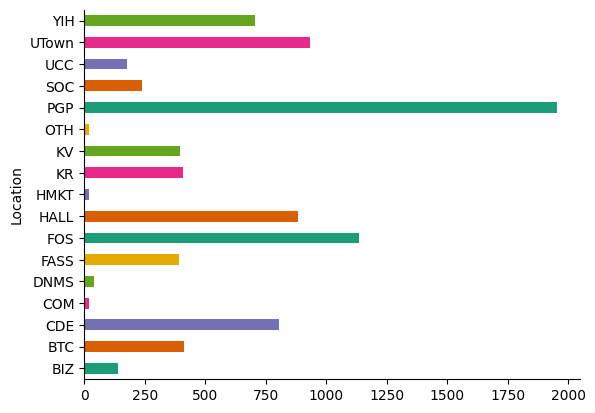

In [ ]:
df.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

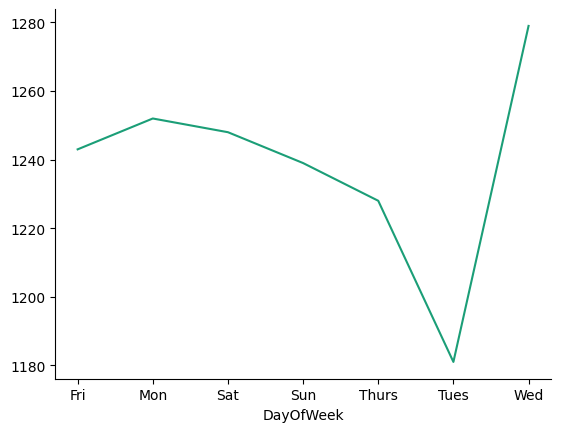

In [ ]:
df.groupby('DayOfWeek').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

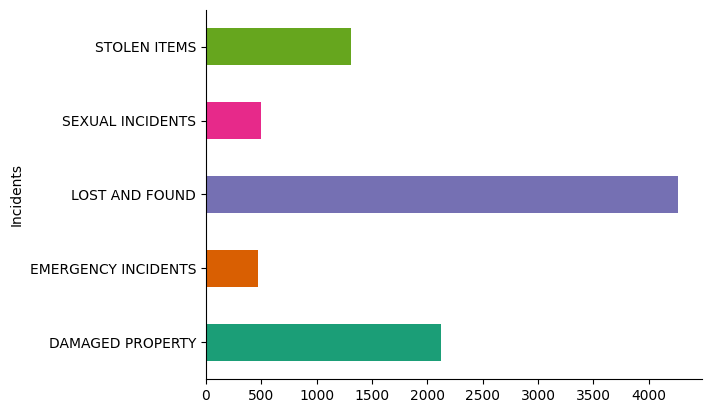

In [ ]:
df.groupby('Incidents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

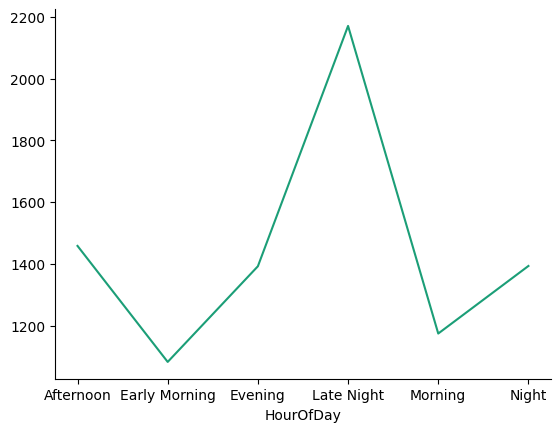

In [ ]:
df.groupby('HourOfDay').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

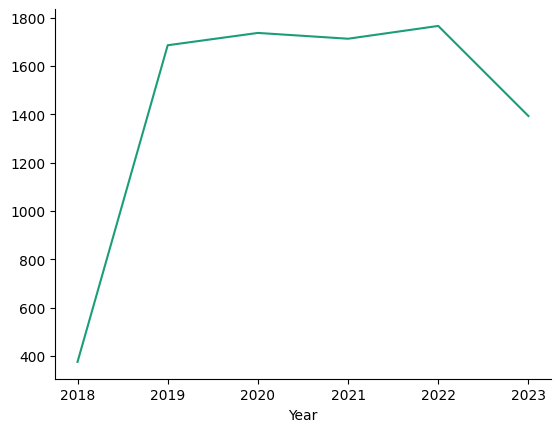

In [ ]:
df.groupby('Year').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

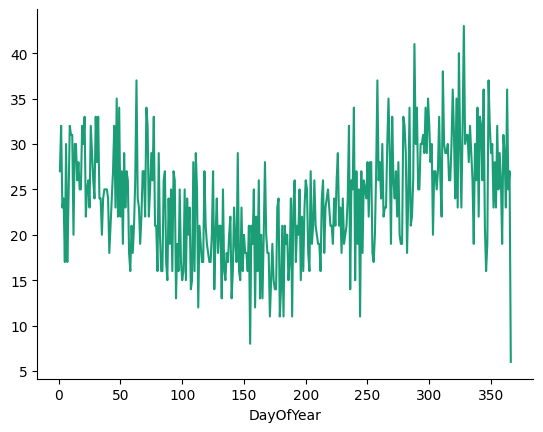

In [ ]:
df.groupby('DayOfYear').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

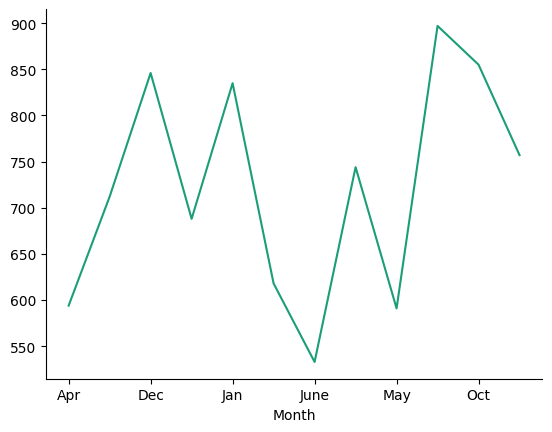

In [ ]:
df.groupby('Month').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

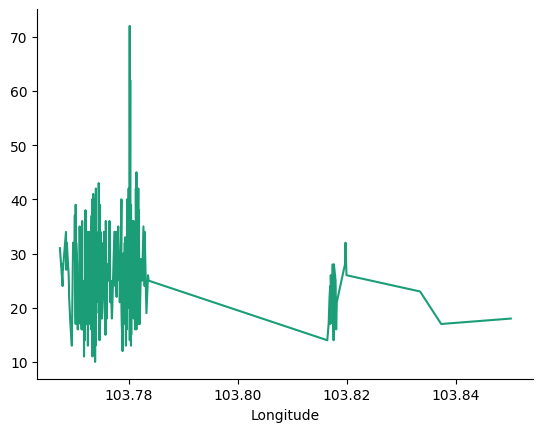

In [ ]:
 df.groupby('Longitude').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

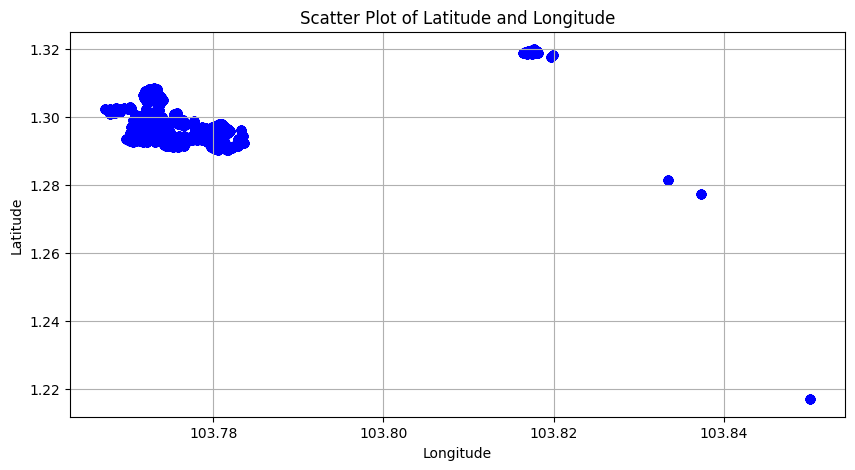

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', marker='o')
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
min(df['Longitude'])

103.767326

In [ ]:
df_l = df.dropna(subset=['Latitude', 'Longitude'])
lat_bins = np.linspace(df_l['Latitude'].min(), df_l['Latitude'].max(), 100)
lon_bins = np.linspace(df_l['Longitude'].min(), df_l['Longitude'].max(), 100)

# Compute the 2D histogram
h, xedges, yedges = np.histogram2d(df_l['Latitude'], df_l['Longitude'], bins=[lat_bins, lon_bins])


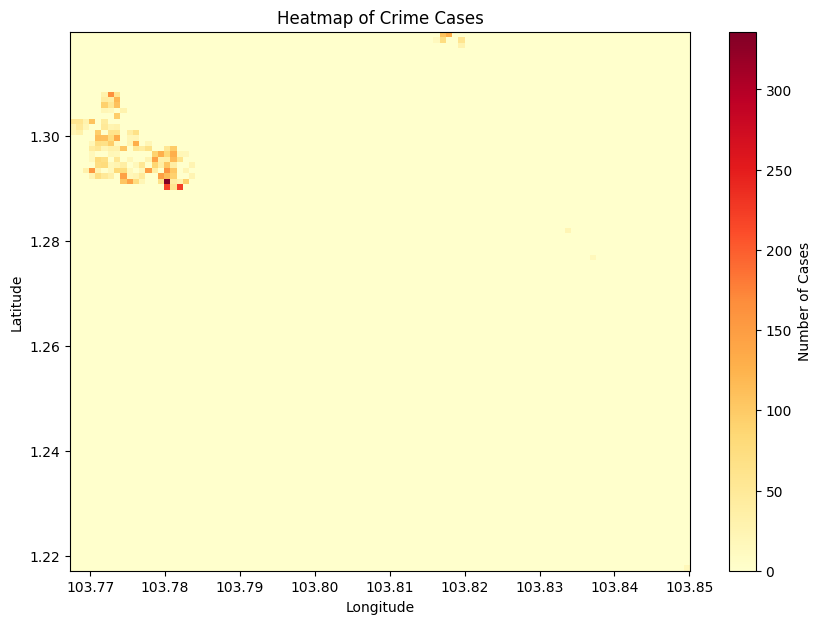

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist2d(df_l['Longitude'], df_l['Latitude'], bins=[lon_bins, lat_bins], cmap='YlOrRd')
plt.title('Heatmap of Crime Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Number of Cases')
plt.show()

In [ ]:
m = folium.Map([1.3521, 103.8198], zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_l.iterrows()]

# Add heatmap to map
HeatMap(heat_data).add_to(m)
m

##**Modeling**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41456.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 41456.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 41456.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 41456.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 41456.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1296, cost: 38778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1105, cost: 38580.0
Init: initializing centroids
Init: initializing clusters
Starting ite

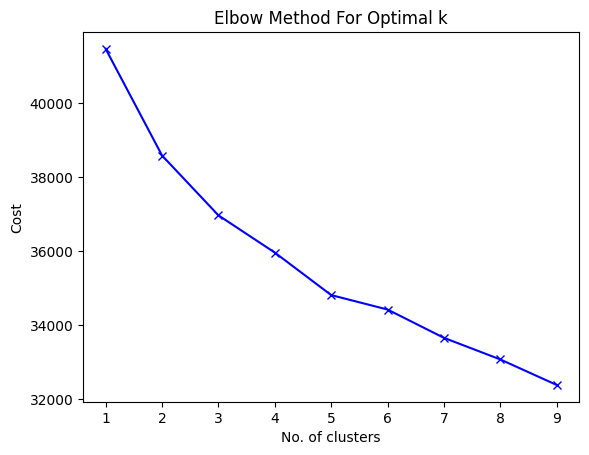

In [ ]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# choosing k = 7
km7 = KModes(n_clusters = 7, init = "Huang", n_init = 5, verbose = 1)
clusters7 = km7.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 857, cost: 25016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1118, cost: 25050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 981, cost: 26296.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 25449.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 924, cost: 25434.0
Best run was number 1


In [ ]:
print(km7.cluster_centroids_)

[['LOST AND FOUND' 'PGP' 'Sep' 'Sat' 'Late Night']
 ['LOST AND FOUND' 'PGP' 'Aug' 'Tues' 'Afternoon']
 ['DAMAGED PROPERTY' 'PGP' 'May' 'Sun' 'Early Morning']
 ['DAMAGED PROPERTY' 'PGP' 'Nov' 'Sun' 'Night']
 ['STOLEN ITEMS' 'CDE' 'Sep' 'Wed' 'Evening']
 ['LOST AND FOUND' 'FOS' 'Nov' 'Thurs' 'Late Night']
 ['STOLEN ITEMS' 'CDE' 'June' 'Tues' 'Late Night']]


In [ ]:
clusters_df7 = pd.DataFrame(clusters7)
clusters_df7.columns = ['Cluster7']
combined7 = pd.concat([data, clusters_df7], axis = 1).reset_index()
combined7.head()

,index,Incidents,Location,Month,DayOfWeek,HourOfDay,Cluster7
0,0,LOST AND FOUND,YIH,Feb,Wed,Afternoon,1.0
1,2,LOST AND FOUND,PGP,Mar,Sat,Afternoon,0.0
2,4,LOST AND FOUND,PGP,Mar,Mon,Late Night,0.0
3,6,LOST AND FOUND,KV,Nov,Fri,Evening,0.0
4,8,DAMAGED PROPERTY,UTown,Sep,Fri,Afternoon,4.0


In [ ]:
grouped=combined7.groupby('Cluster7')['Cluster7'].count().sort_values(ascending=False)
result_df = grouped.reset_index(name='Count')
cat = result_df['Cluster7']
ct=result_df['Count']

In [ ]:
def mapping(series):
  temp={}
  for i in range(len(series)):
    temp[series[i]]=i
  return temp


In [ ]:
combined7.groupby('Cluster7')['Cluster7'].count().sort_values(ascending=False)

Cluster7
0.0    3072
1.0    1661
2.0    1067
5.0     982
3.0     789
4.0     746
6.0     353
Name: Cluster7, dtype: int64

In [ ]:
print(cat)
print(ct)

0    0.0
1    1.0
2    2.0
3    5.0
4    3.0
5    4.0
6    6.0
Name: Cluster7, dtype: float64
0    3072
1    1661
2    1067
3     982
4     789
5     746
6     353
Name: Count, dtype: int64


In [ ]:
combined7['Hotspot']=combined7['Cluster7'].map(mapping(cat))

In [ ]:
combined7.head()

,index,Incidents,Location,Month,DayOfWeek,HourOfDay,Cluster7,Hotspot
0,0,LOST AND FOUND,YIH,Feb,Wed,Afternoon,1.0,1.0
1,2,LOST AND FOUND,PGP,Mar,Sat,Afternoon,0.0,0.0
2,4,LOST AND FOUND,PGP,Mar,Mon,Late Night,0.0,0.0
3,6,LOST AND FOUND,KV,Nov,Fri,Evening,0.0,0.0
4,8,DAMAGED PROPERTY,UTown,Sep,Fri,Afternoon,4.0,5.0


In [75]:
def predict_hotspot(data,km,cat):
  cluster=pd.Series(km.predict(data))
  hotspot=cluster.map(mapping(cat))
  return (cluster,hotspot)

In [ ]:
a=data.head(5)

In [76]:
predict_hotspot(a,km7,cat)

(0    1
 1    0
 2    0
 3    5
 4    0
 dtype: uint16,
 0    1
 1    0
 2    0
 3    3
 4    0
 dtype: int64)

In [ ]:
data

,Incidents,Location,Month,DayOfWeek,HourOfDay
0,LOST AND FOUND,YIH,Feb,Wed,Afternoon
2,LOST AND FOUND,PGP,Mar,Sat,Afternoon
4,LOST AND FOUND,PGP,Mar,Mon,Late Night
6,LOST AND FOUND,KV,Nov,Fri,Evening
8,DAMAGED PROPERTY,UTown,Sep,Fri,Afternoon
...,...,...,...,...,...
17330,DAMAGED PROPERTY,SOC,Feb,Fri,Late Night
17332,LOST AND FOUND,YIH,June,Tues,Night
17334,LOST AND FOUND,YIH,Apr,Thurs,Morning
17336,SEXUAL INCIDENTS,YIH,Oct,Sun,Night


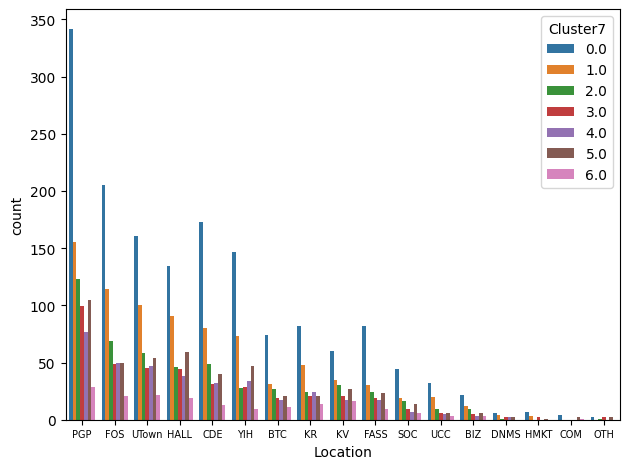

In [ ]:
ax=sns.countplot(x = combined7['Location'], order = combined7['Location'].value_counts().index, hue = combined7['Cluster7'])

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

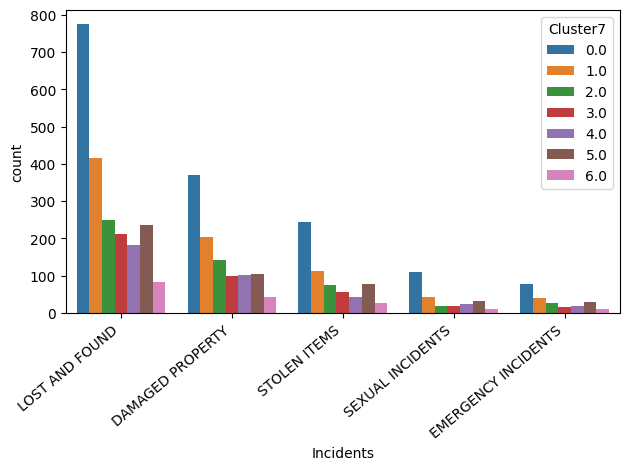

In [ ]:
ax=sns.countplot(x = combined7['Incidents'], order = combined7['Incidents'].value_counts().index, hue = combined7['Cluster7'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

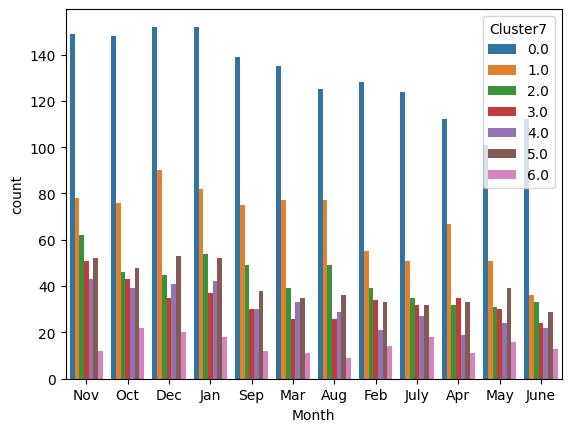

In [ ]:
sns.countplot(x = combined7['Month'], order = combined7['Month'].value_counts().index, hue = combined7['Cluster7'])
plt.show()

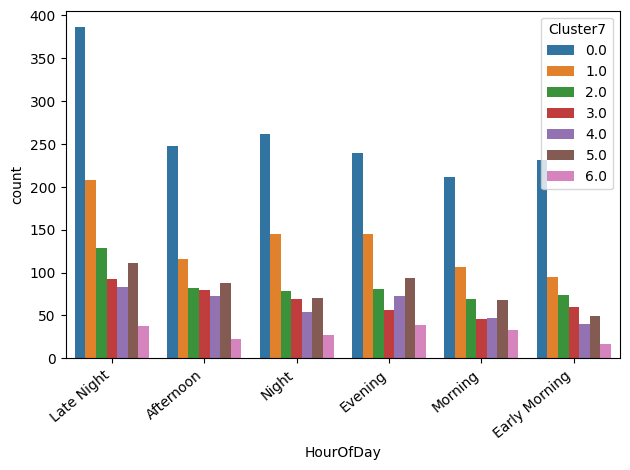

In [ ]:
ax=sns.countplot(x = combined7['HourOfDay'], order = combined7['HourOfDay'].value_counts().index, hue = combined7['Cluster7'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# choosing k = 5
km = KModes(n_clusters = 5, init = "random", n_init = 5, verbose = 1)
clusters = km.fit_predict(data)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 571, cost: 26870.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1247, cost: 26840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1799, cost: 26632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1504, cost: 26456.0
Best run was number 5


In [ ]:
print(km.cluster_centroids_)

[['DAMAGED PROPERTY' 'PGP' 'Jan' 'Tues' 'Late Night']
 ['LOST AND FOUND' 'UTown' 'July' 'Sat' 'Late Night']
 ['LOST AND FOUND' 'FOS' 'Jan' 'Thurs' 'Late Night']
 ['DAMAGED PROPERTY' 'PGP' 'Feb' 'Fri' 'Late Night']
 ['LOST AND FOUND' 'PGP' 'Oct' 'Wed' 'Morning']]


In [ ]:
data_copy = data.copy()
data = data_copy.reset_index()

In [ ]:
clusters_df = pd.DataFrame(clusters)
clusters_df.columns = ['Cluster']
combined = pd.concat([data, clusters_df], axis = 1).reset_index()
combined.head()

,level_0,index,Incidents,Location,Month,DayOfWeek,HourOfDay,Cluster
0,0,0,LOST AND FOUND,YIH,Feb,Wed,Afternoon,4
1,1,2,LOST AND FOUND,PGP,Mar,Sat,Afternoon,1
2,2,4,LOST AND FOUND,PGP,Mar,Mon,Late Night,0
3,3,6,LOST AND FOUND,KV,Nov,Fri,Evening,1
4,4,8,DAMAGED PROPERTY,UTown,Sep,Fri,Afternoon,3


In [68]:
grouped1=combined.groupby('Cluster')['Cluster'].count().sort_values(ascending=False)
result_df = grouped1.reset_index(name='Count')
cat1 = result_df['Cluster']
ct1=result_df['Count']

In [69]:
print(cat1)
print(ct1)

0    0
1    1
2    2
3    4
4    3
Name: Cluster, dtype: uint64
0    2833
1    2330
2    1417
3    1272
4     818
Name: Count, dtype: int64


In [70]:
combined['Hotspot']=combined['Cluster'].map(mapping(cat1))

In [72]:
combined.head()

,level_0,index,Incidents,Location,Month,DayOfWeek,HourOfDay,Cluster,Hotspot
0,0,0,LOST AND FOUND,YIH,Feb,Wed,Afternoon,4,3
1,1,2,LOST AND FOUND,PGP,Mar,Sat,Afternoon,1,1
2,2,4,LOST AND FOUND,PGP,Mar,Mon,Late Night,0,0
3,3,6,LOST AND FOUND,KV,Nov,Fri,Evening,1,1
4,4,8,DAMAGED PROPERTY,UTown,Sep,Fri,Afternoon,3,4


In [77]:
predict_hotspot(a,km,cat1)

(0    4
 1    1
 2    0
 3    1
 4    3
 dtype: uint16,
 0    3
 1    1
 2    0
 3    1
 4    4
 dtype: int64)

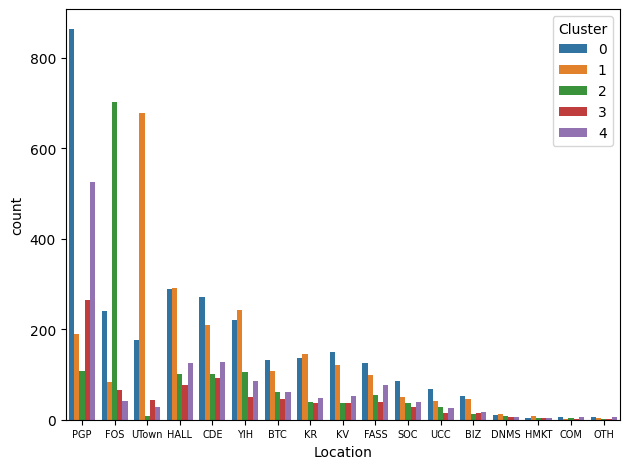

In [ ]:
import seaborn as sns
ax=sns.countplot(x = combined['Location'], order = combined['Location'].value_counts().index, hue = combined['Cluster'])

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

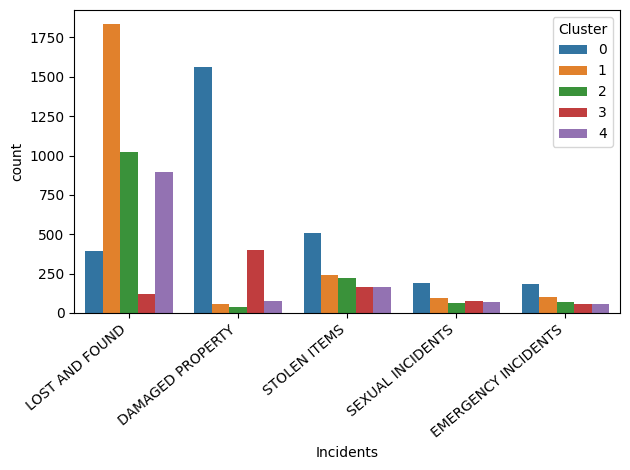

In [ ]:
ax=sns.countplot(x = combined['Incidents'], order = combined['Incidents'].value_counts().index, hue = combined['Cluster'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

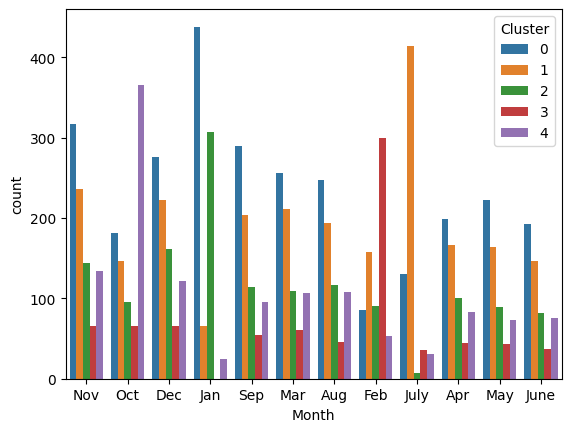

In [ ]:
sns.countplot(x = combined['Month'], order = combined['Month'].value_counts().index, hue = combined['Cluster'])
plt.show()

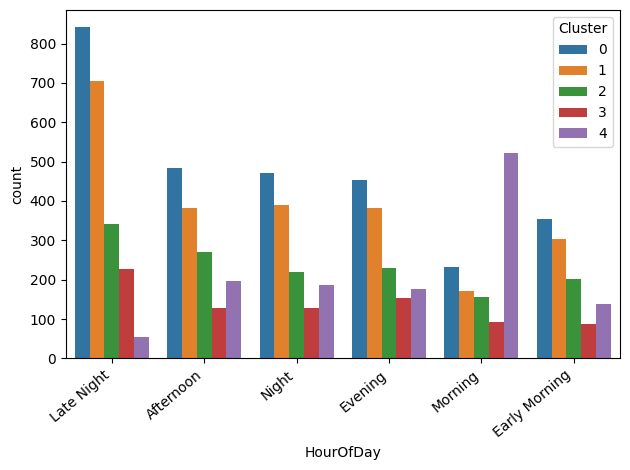

In [ ]:
ax=sns.countplot(x = combined['HourOfDay'], order = combined['HourOfDay'].value_counts().index, hue = combined['Cluster'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
combined.groupby('Cluster')['Cluster'].count()

Cluster
0    2833
1    2330
2    1417
3     818
4    1272
Name: Cluster, dtype: int64

# **Modelling using Building instead of Location**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34695.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34695.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 34695.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 34695.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 34695.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 625, cost: 32674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 455, cost: 32377.0
Init: initializing centroids
Init: initializing clusters
Starting itera

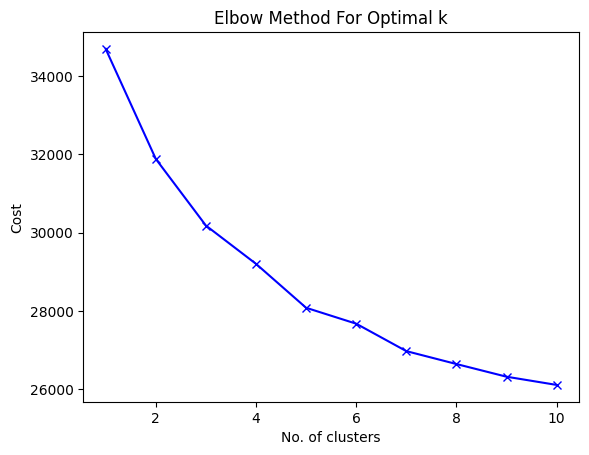

In [ ]:
data1=df[['Incidents','Building','Month', 'DayOfWeek', 'HourOfDay']]
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data1)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# choosing k = 9
km1 = KModes(n_clusters = 9, init = "random", n_init = 5, verbose = 1)
clusters_bldg = km1.fit_predict(data1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 657, cost: 26009.0
Run 1, iteration: 2/100, moves: 2, cost: 26009.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1429, cost: 26526.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 47, cost: 27410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 45, cost: 26466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2866, cost: 26124.0
Run 5, iteration: 2/100, moves: 21, cost: 26124.0
Best run was number 1


In [ ]:
print(km1.cluster_centroids_)

[['DAMAGED PROPERTY' '18 PGP BUNGALOW' 'July' 'Sun' 'Late Night']
 ['LOST AND FOUND' 'SHEARES HALL (BLOCK D)' 'Aug' 'Fri' 'Early Morning']
 ['STOLEN ITEMS' 'PGP RESIDENCES (BLOCK 24)' 'Sep' 'Sat' 'Morning']
 ['DAMAGED PROPERTY' 'DESIGN & ENVIRONMENT BLOCK 2' 'Mar' 'Tues'
  'Morning']
 ['STOLEN ITEMS' '11 KR BUNGALOW' 'Dec' 'Thurs' 'Early Morning']
 ['LOST AND FOUND' 'PGP RESIDENCES (BLOCK 26)' 'Feb' 'Sun' 'Afternoon']
 ['DAMAGED PROPERTY' '4 KR BUNGALOW' 'May' 'Wed' 'Evening']
 ['LOST AND FOUND' 'CINNAMON COLLEGE -MPH' 'Nov' 'Mon' 'Late Night']
 ['LOST AND FOUND' 'PGP RESIDENCES (BLOCK 28)' 'Jan' 'Fri' 'Evening']]


In [ ]:
clusters_df_bldg = pd.DataFrame(clusters_bldg)
clusters_df_bldg.columns = ['Cluster']
combined_bldgs = pd.concat([data1, clusters_df_bldg], axis = 1).reset_index()
combined_bldgs.head()

,index,Incidents,Building,Month,DayOfWeek,HourOfDay,Cluster
0,0,LOST AND FOUND,SRC MINI GRAND STAND,Feb,Wed,Afternoon,5.0
1,2,LOST AND FOUND,PGP RESIDENCES (BLOCK 13),Mar,Sat,Afternoon,7.0
2,4,LOST AND FOUND,PGP RESIDENCES CANTEEN 2,Mar,Mon,Late Night,0.0
3,6,LOST AND FOUND,"KENT VALE APARTMENT BLK G, 115",Nov,Fri,Evening,7.0
4,8,DAMAGED PROPERTY,YALE FITNESS CENTER,Sep,Fri,Afternoon,2.0


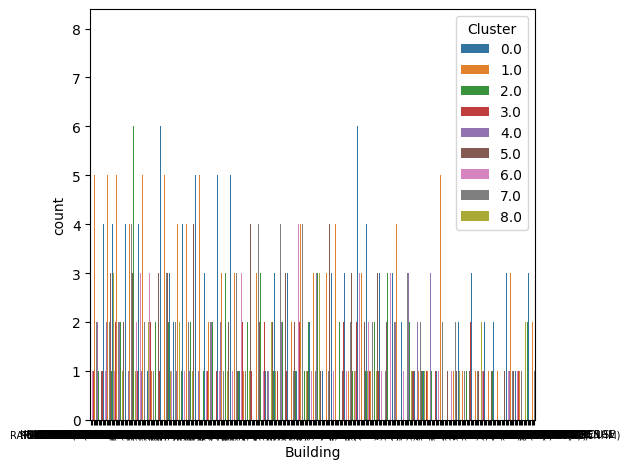

In [ ]:
import seaborn as sns
ax=sns.countplot(x = combined_bldgs['Building'], order = combined_bldgs['Building'].value_counts().index, hue = combined_bldgs['Cluster'])

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

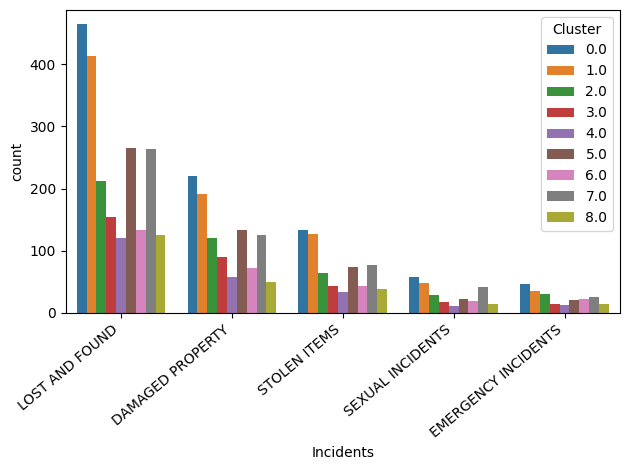

In [ ]:
ax=sns.countplot(x = combined_bldgs['Incidents'], order = combined_bldgs['Incidents'].value_counts().index, hue = combined_bldgs['Cluster'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

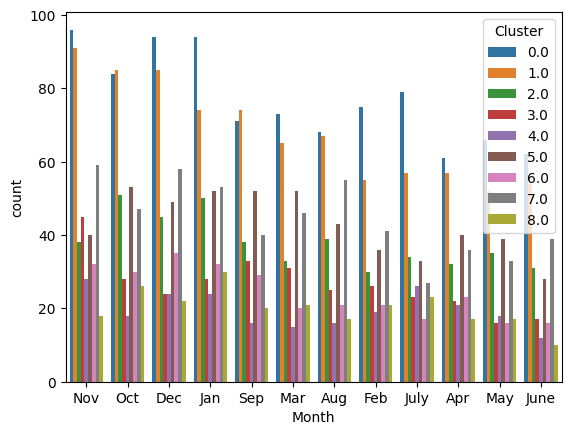

In [ ]:
sns.countplot(x = combined_bldgs['Month'], order = combined_bldgs['Month'].value_counts().index, hue = combined_bldgs['Cluster'])
plt.show()